In [1]:
#importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

In [3]:
data = pd.read_csv('tcp-connection.csv')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [4]:
data.shape

(494021, 42)

In [5]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

In [6]:
#basic info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [7]:
#checking for null values
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
#datatypes in dataset
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serrer_rate          

In [10]:
#statistical info about the numerical features
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#intrusion class distribution
print(data['intrusion'].value_counts().shape[0])
data['intrusion'].value_counts()

23


b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

In [12]:
#defining a function for bar plot
def bar_graph(column):
    data[column].value_counts().plot(kind='bar')

In [13]:
#unique values of feature: protocol-type
protocol_unique = data['protocol_type'].value_counts()
print('Number of unique values for protocol : ', protocol_unique.shape[0])
print(protocol_unique.head())

Number of unique values for protocol :  3
b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64


Text(0.5, 1.0, 'protocol type')

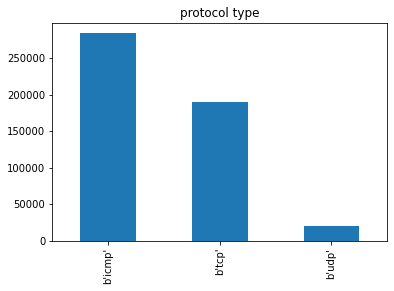

In [14]:
#categorical feature: protocol-type
bar_graph('protocol_type')
plt.title('protocol type')

In [15]:
#label encoding
le = LabelEncoder()
data['protocol_type'] = le.fit_transform(data['protocol_type'])

In [16]:
#unique values of feature: service
service_unique = data['service'].value_counts()
print('Number of unique values for service : ', service_unique.shape[0])
print(service_unique.head())

Number of unique values for service :  66
b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
Name: service, dtype: int64


Text(0.5, 1.0, 'service')

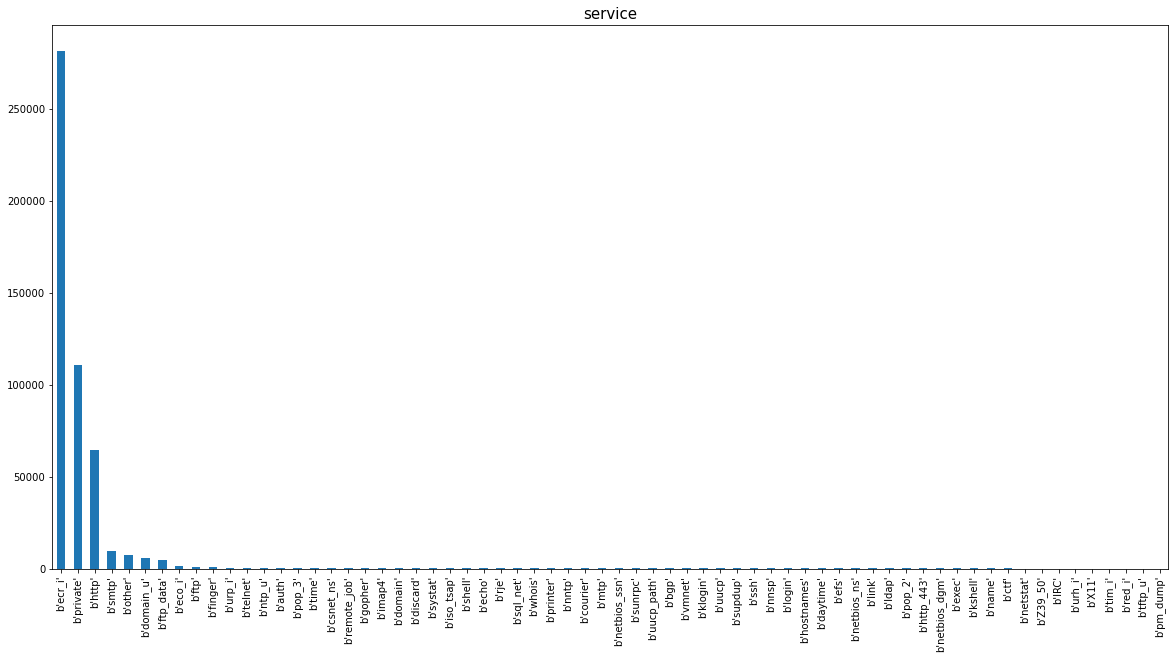

In [17]:
#service - barplot
plt.figure(figsize=(20,10))
bar_graph('service')
plt.title('service', fontsize=15)

In [19]:
#label encoding
data['service'] = le.fit_transform(data['service'])

In [20]:
#unique values of feature: flag
flag_unique = data['flag'].value_counts()
print('Number of unique values for flag : ', flag_unique.shape[0])
print(flag_unique.head())

Number of unique values for flag :  11
b'SF'      378440
b'S0'       87007
b'REJ'      26875
b'RSTR'       903
b'RSTO'       579
Name: flag, dtype: int64


Text(0.5, 1.0, 'flag')

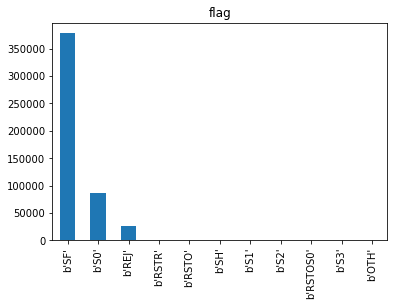

In [21]:
bar_graph('flag')
plt.title('flag')

In [22]:
#label encoding
data['flag'] = le.fit_transform(data['flag'])

In [23]:
#unique values of feature: intrusion
intrusion_unique = data['intrusion'].value_counts()
print('Number of unique values for intrusion : ', intrusion_unique.shape[0])
print(intrusion_unique.head())

Number of unique values for intrusion :  23
b'smurf.'      280790
b'neptune.'    107201
b'normal.'      97278
b'back.'         2203
b'satan.'        1589
Name: intrusion, dtype: int64


Text(0.5, 1.0, 'intrusion')

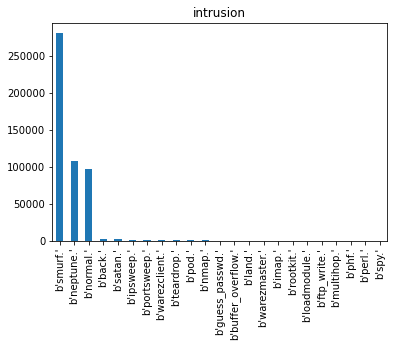

In [24]:
#intrusion - bar plot
bar_graph('intrusion')
plt.title('intrusion')

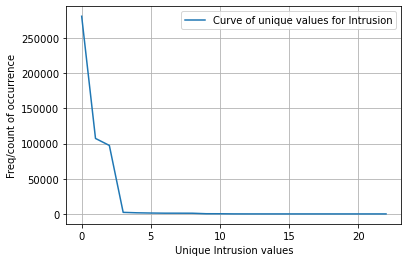

In [25]:
plt.plot(intrusion_unique.values, label='Curve of unique values for Intrusion')
plt.xlabel('Unique Intrusion values')
plt.ylabel('Freq/count of occurrence')

plt.legend()
plt.grid()
plt.show();

In [26]:
#creating a copy of DataFrame
df = data.copy(deep=True)

In [27]:
#creating a function to give binary label to intrusion

def labeling(x):
    if x == "b'normal.'":
        return 0
    else:
        return 1

In [28]:
#storing intrusion classes in the variable label    
label = df['intrusion']

#mapping all intrusion classes to the desired binary output 0-normal and 1-others
class_label = label.map(labeling)

#creating a new column called label
df['label'] = class_label

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,label
0,0,2,11,9,44,134,0,0,0,0,...,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.',0
1,0,1,50,9,1489,385,0,0,0,0,...,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.',0
2,0,0,14,9,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.',1
3,0,0,14,9,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.',1
4,0,1,45,5,0,0,0,0,0,0,...,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.',1


In [29]:
df['label'].value_counts()

1    396743
0     97278
Name: label, dtype: int64

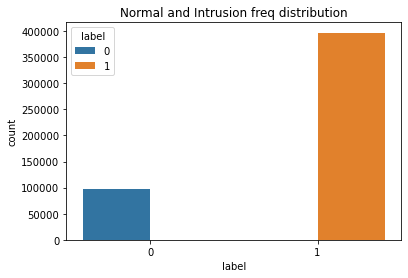

In [31]:
#distribution plot of class 1 and class 0
sns.countplot(x='label', data=df, hue='label')
plt.title("Normal and Intrusion freq distribution")
plt.show();

In [32]:
#correlation statistics of numerical variables
df.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
duration,1.000000,0.163251,0.078995,0.019739,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,...,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465,-0.118014
protocol_type,0.163251,1.000000,0.741244,-0.476091,0.001904,0.024519,0.006178,0.113568,0.002381,0.040859,...,-0.638440,-0.617332,0.406943,-0.861009,0.085012,0.430002,0.428811,0.237574,0.230942,-0.616601
service,0.078995,0.741244,1.000000,-0.725525,-0.001206,0.006135,-0.002285,0.067200,0.004074,-0.012767,...,-0.866771,-0.872110,0.384886,-0.793581,-0.028678,0.714014,0.712969,0.304408,0.302061,-0.131723
flag,0.019739,-0.476091,-0.725525,1.000000,-0.002880,0.013191,-0.008427,0.024541,0.001322,0.021437,...,0.790041,0.799055,-0.262008,0.609977,-0.065455,-0.584325,-0.582795,-0.726263,-0.727187,-0.155672
src_bytes,0.004258,0.001904,-0.001206,-0.002880,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,...,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328,0.000936
dst_bytes,0.005440,0.024519,0.006135,0.013191,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,...,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471,-0.037709
land,-0.000452,0.006178,-0.002285,-0.008427,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,...,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665,0.002542
wrong_fragment,-0.003235,0.113568,0.067200,0.024541,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,...,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904,0.023630
urgent,0.003786,0.002381,0.004074,0.001322,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,...,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641,-0.001498
hot,0.013213,0.040859,-0.012767,0.021437,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,...,-0.038730,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749,-0.006327


In [33]:
#drop two redundant feature columns
df = df.drop(["num_outbound_cmds", "is_host_login"], axis=1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,label
0,0,2,11,9,44,134,0,0,0,0,...,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.',0
1,0,1,50,9,1489,385,0,0,0,0,...,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.',0
2,0,0,14,9,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.',1
3,0,0,14,9,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.',1
4,0,1,45,5,0,0,0,0,0,0,...,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.',1


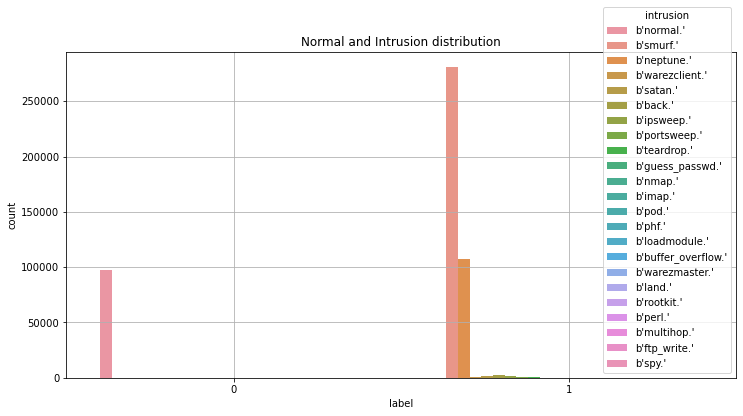

In [34]:
#distribution plot of class 0 and class 1
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='label', data=df, hue='intrusion')
plt.title("Normal and Intrusion distribution")
plt.grid()
plt.show();

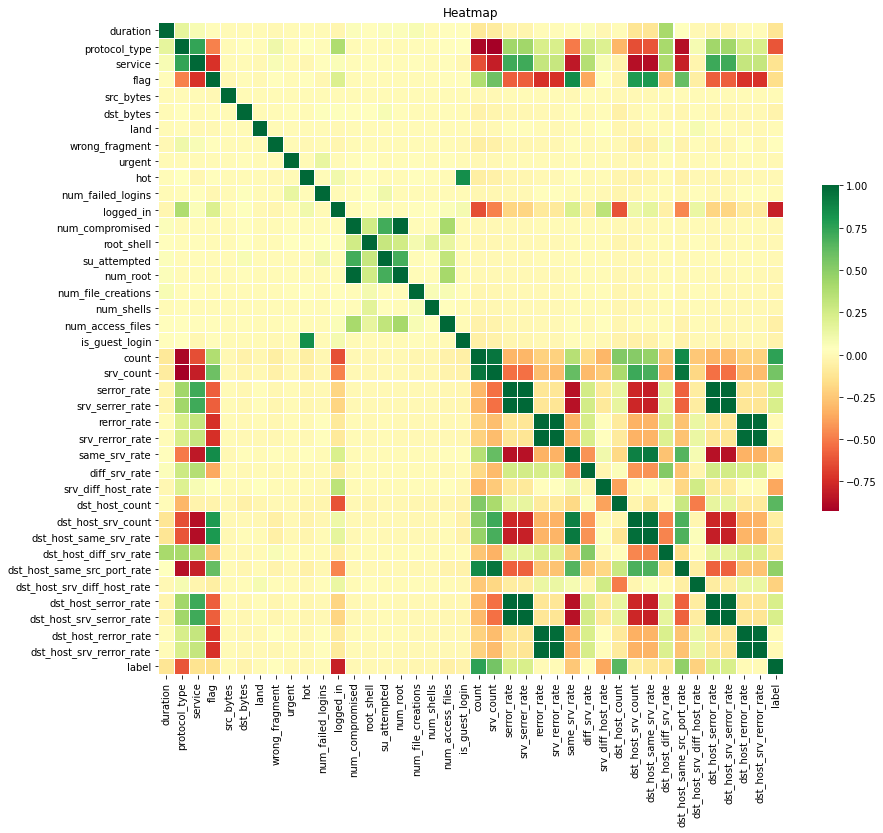

In [35]:
#Heatmap representing the correlation matrix

corr = df.corr()

plt.figure(figsize=(14,12))

sns.heatmap(corr, linewidths=.1, cmap='RdYlGn', annot=False, cbar_kws={"shrink":.5})

plt.title('Heatmap')

plt.yticks(rotation=0);

In [36]:
#correlation values: correlation with target 'label'
corr['label'].sort_values(ascending=False)

label                          1.000000
count                          0.752978
dst_host_count                 0.642110
srv_count                      0.566829
dst_host_same_src_port_rate    0.481458
dst_host_srv_serror_rate       0.227975
serror_rate                    0.227739
dst_host_serror_rate           0.227205
srv_serrer_rate                0.227189
wrong_fragment                 0.023630
diff_srv_rate                  0.016522
dst_host_srv_rerror_rate       0.003404
rerror_rate                    0.003190
srv_rerror_rate                0.003162
land                           0.002542
src_bytes                      0.000936
dst_host_rerror_rate           0.000860
num_failed_logins             -0.001060
urgent                        -0.001498
num_compromised               -0.005046
root_shell                    -0.005871
hot                           -0.006327
su_attempted                  -0.008789
num_root                      -0.011006
num_shells                    -0.014951


In [37]:
#drop categorical column intrusion before model creation
df = df.drop('intrusion', axis=1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,2,11,9,44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0
1,0,1,50,9,1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,0
2,0,0,14,9,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,1
3,0,0,14,9,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,1
4,0,1,45,5,0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,1
